#                                               Week 6 Group Activity

1. Import jeopardy.csv and create a dataframe from the data. Find out the following:

    a. How many rows are there in the dataframe? What does a row represent in this dataset? What is the “grain”?

    b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?

    c. How many unique shows were there each year?

    d. How many times was each category used?

    e. Which month (over the years) has had the most shows?

    f. Are there any answers that appeared multiple times? Find the questions for the top three most common answers

In [1]:
import pandas as pd

In [2]:
jeopardy = pd.read_csv("JEOPARDY_CSV.csv")

jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


#### a. How many rows are there in the dataframe? What does a row represent in this dataset? What is the “grain”?

In [15]:
jeopardy.count()

Show Number    216930
 Air Date      216930
 Round         216930
 Category      216930
 Value         216930
 Question      216930
 Answer        216928
dtype: int64

In [11]:
# There are 216930 rows in the dataframe. 
# Rows here represent each question answer pair asked in every show over a period of time.
# Grain is a subset of exisitng data that caters to specific information as required.

#### b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?

In [21]:
# Cleaning the data would mean to remove duplicates or ensure the datatyoe in as per the correct format.
# In this data fram the Air Date column is a string and needs to be change to datetime format to perform analysis.
# Also need to remove whitespaces in front of column names

#### c. How many unique shows were there each year?

In [17]:
print(type(jeopardy[" Air Date"][0]))

jeopardy[" Air Date"] = pd.to_datetime(jeopardy[" Air Date"])

print(type(jeopardy[" Air Date"][0]))
jeopardy.head()

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [18]:
jeopardy["year"] = pd.DatetimeIndex(jeopardy[" Air Date"]).year

jeopardy_grp_by_year = jeopardy.groupby("year")

jeopardy_show_per_year = jeopardy_grp_by_year[["Show Number"]].nunique()

jeopardy_show_per_year.head(10)

,Show Number
year,
1984,23
1985,16
1986,25
1987,22
1988,22
1989,36
1990,73
1991,24
1992,32


#### d. How many times was each category used?

In [22]:
jeopardy[[" Category"]].value_counts()

 Category             
BEFORE & AFTER            547
SCIENCE                   519
LITERATURE                496
AMERICAN HISTORY          418
POTPOURRI                 401
                         ... 
FOREIGN-BORN INVENTORS      1
WORD HISTORIES              1
FOREIGN WARS                1
HISTORIC NAMESAKES          1
U.S. GEOLOGY                1
Length: 27983, dtype: int64

#### e. Which month (over the years) has had the most shows?

In [42]:
jeopardy["month"] = pd.DatetimeIndex(jeopardy[" Air Date"]).month


,Show Number,Air Date,Round,Category,Value,Question,Answer,month
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,12
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,12
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,12
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,12
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,12


In [87]:
jeopardy_grp_by_month = jeopardy.groupby("month")
jeopardy_show_per_month = jeopardy_grp_by_month[["Show Number"]].nunique()
jeopardy_show_per_month.sort_values("Show Number",ascending=False)

,Show Number
month,
11,434
1,355
12,352
5,351
10,347
4,330
3,329
6,321
2,293


In [ ]:
# November had the most no. of shows over the years

#### f. Are there any answers that appeared multiple times? Find the questions for the top three most common answers

In [89]:
jeopardy[" Answer"].value_counts()

China                             216
Australia                         215
Japan                             196
Chicago                           194
France                            193
                                 ... 
the Hopis                           1
free parking                        1
Lady Diana Spencer                  1
trailer park                        1
Grigori Alexandrovich Potemkin      1
Name:  Answer, Length: 88236, dtype: int64

In [90]:
jeopardy[jeopardy[" Answer"]=="China"][[" Question"]]

,Question
598,In 1958 this country launched its second 5-yea...
1507,"In 1999 this country began 3 ""golden weeks"" of..."
3050,P.F. Chang's is an upscale bistro specializing...
3476,This country's National People's Congress has ...
5990,"Of the 6 nations India borders, this one is th..."
...,...
214506,Principal mountain ranges in this large countr...
215115,Dr. Sun Yat-Sen
215556,Tsingtao
215912,"Because of a policy adopted in 1979, this coun..."


In [91]:
jeopardy[jeopardy[" Answer"]=="Australia"][[" Question"]]

,Question
560,A 1994 festival honoring this country featured...
688,Large aboriginal populations live in this coun...
1236,Papua New Guinea is just off this country's Ca...
3175,In 1962 this country's Dawn Fraser became the ...
4373,"It's the lowest, flattest & smallest continent"
...,...
212513,The good folk at gdaypubs.com are making a maj...
212711,Eons of wind & rain have worn away ancient mtn...
213583,Dedicated to upholding this nation's constitut...
214876,If you stay at Cradle Mountain Lodge in this c...


In [92]:
jeopardy[jeopardy[" Answer"]=="Japan"][[" Question"]]

,Question
404,In February 1904 this country attacked the Rus...
874,Sanma aisu is fish-flavored ice cream & taco a...
1864,The monster seen here (Godzilla) originally ap...
3106,The mauve flowers of the Paulownia tree adorn ...
4080,This country's 12th century sculptor Unkei is ...
...,...
211129,"On Feb. 8, 1904 this country attacked Port Art..."
214711,"This nation's maritime self-defense force, suc..."
215513,"On July 8, 1853 Matthew Perry presented a lett..."
215568,Kirin


### 2. Create a visualization that shows the top 5 categories (those referenced the most often). Be sure to label appropriately

In [93]:
jeopardy_top_5_cat = jeopardy[[" Category"]].value_counts().head()

In [94]:
jeopardy_top_5_cat.head()

 Category       
BEFORE & AFTER      547
SCIENCE             519
LITERATURE          496
AMERICAN HISTORY    418
POTPOURRI           401
dtype: int64

In [95]:
jeopardy_top_5_cat_df = pd.DataFrame(jeopardy_top_5_cat)

In [96]:
#jeopardy_top_5_cat_df["Count"] 

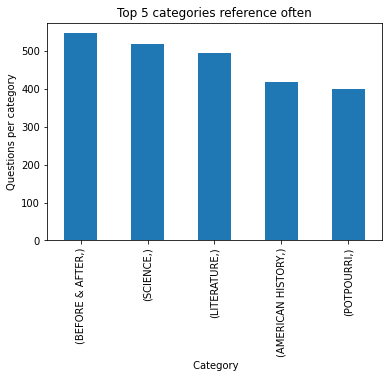

In [97]:
jeopardy_top_5_cat.plot(kind='bar', ylabel="Questions per category", title = "Top 5 categories reference often")


plt.show()